In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

## 1. P 자동차 회사의 차종, 마력, 평균연비를 나타내는 표

In [95]:
data = {'hp':[130, 250, 190, 300, 210, 220, 170], 
        'efficiency':[16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]}

df = pd.DataFrame(data)
#df = df.T
#df.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df

,hp,efficiency
0,130,16.3
1,250,10.2
2,190,11.1
3,300,7.1
4,210,12.1
5,220,13.2
6,170,14.2


+ 1-1. P 자동차 회사의 마력과 연비 사이에는 어떤 상관관계가 있을까?  
선형회귀분석을 통해 선형회귀모델의 절편과 계수를 구해라.  
마지막으로 이 선형회귀모델이 입력 마력 값에 대해 연비를 에측하는 데 얼마나 적합한지 예측 점수를 출력해보라.

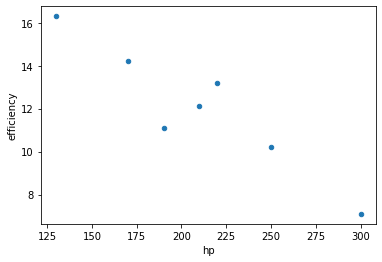

In [97]:
df.plot(kind='scatter', x='hp', y='efficiency');

In [98]:
x = df['hp'].to_numpy()
y = df['efficiency'].to_numpy()

x = x[:, np.newaxis]
print(x.shape)
X = np.c_[np.ones(len(x)), x]
print(X.shape)

(7, 1)
(7, 2)


In [54]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f'계수 : {theta[1]}')
print(f'절편 : {theta[0]}')

계수 : -0.05027472527472546
절편 : 22.58626373626376


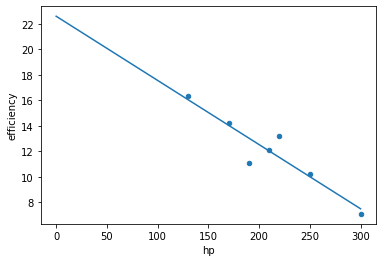

In [99]:
def h(x, theta):
    return x * theta[1] + theta[0]

df.plot(kind='scatter', x='hp', y='efficiency')
plt.plot([0,300], [h(0, theta), h(300, theta)]);

In [100]:
x = df['hp'].to_numpy()[:, np.newaxis]  #(7, 1)
y = df['efficiency'].to_numpy()                 #(7,  )

model = LinearRegression()

model.fit(x, y)

y_pred = model.predict(x)

print(f'계수 : {model.coef_}')
print(f'절편 : {model.intercept_}')
print(f'예측 점수 : {mse(y, y_pred)}')

계수 : [-0.05027473]
절편 : 22.58626373626374
예측 점수 : 0.9761302982731553


+ 1-2) 위의 선형회귀모델을 바탕으로 270마력의 신형엔진을 가진 자동차를 개발하려 한다.  
이 자동차의 연비를 선형회귀모델에 적용하여 구해보자.  
출력은 소수점 둘째 자리까지 출력해보라.

In [73]:
pred = model.predict(np.array([[270, ]]))

print(f'270 마력 자동차의 예상 연비 : {round(float(pred), 2)} km/l' )

270 마력 자동차의 예상 연비 : 9.01 km/l


## 2. P 자동차 회사의 차종, 마력, 총중량을 나타낸 표

In [101]:
data = {'hp':[130, 250, 190, 300, 210, 220, 170], 
        'weight':[1900, 2600, 2200, 2900, 2400, 2300, 2100],
        'efficiency':[16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]}

df = pd.DataFrame(data)
df

,hp,weight,efficiency
0,130,1900,16.3
1,250,2600,10.2
2,190,2200,11.1
3,300,2900,7.1
4,210,2400,12.1
5,220,2300,13.2
6,170,2100,14.2


+ 2-1. 위 자료를 바탕으로 적절한 선형회귀모델을 구현해라.  
이 모델의 계수, 절편, 예측모델의 점수를 출력하라

In [102]:
X = df[['hp', 'weight']].to_numpy()
y = df['efficiency'].to_numpy()

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f'계수 : {model.coef_}')
print(f'절편 : {model.intercept_}')
print(f'예측 점수 : {mse(y, y_pred)}')

계수 : [-0.00689189 -0.00731081]
절편 : 30.60405405405405
예측 점수 : 0.8519498069498079


+ 2-2. 위 선형회귀모델을 바탕으로 270마력의 신형엔진을 가진 총중량 2500kg의 자동차를 개발하려 한다.  
이 자동차의 연비를 선형회귀모델에 적용하여 구해보라.

In [90]:
pred = model.predict(np.array([[270, 2500]]))

print(f'270 마력 2500kg 자동차의 예상 연비 : {round(float(pred), 2)} km/l' )

270 마력 2500kg 자동차의 예상 연비 : 10.47 km/l


+ 2-3. 마력과 총중량, 연비 사이의 상관관계를 쌍플롯으로 그려보라.

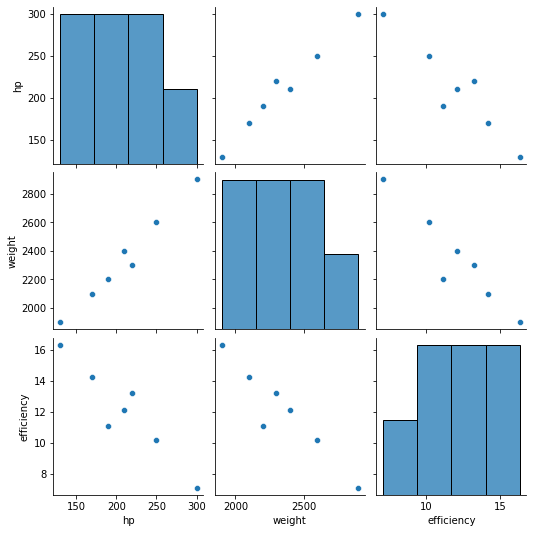

In [103]:
sns.pairplot(df);

+ 2-4. 마력과 총중량, 연비사이의 상관관계를 seaborn의 heatmap으로 가시화해보라.

<AxesSubplot:>

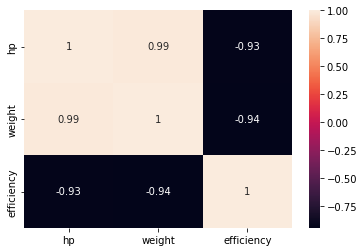

In [105]:
sns.heatmap(df.corr(), annot=True)

+ 2-5. 위 내용을 바탕으로 마력, 총중량, 연비의 상관관계를 조사하고, 이를 3개 이상의 문장으로 요약 정리하라.
    - 마력은 총중량과 양의 상관관계를 가진다. 
    - 마력과 총중량은 모두 연비와 음의 상관관계를 가진다.
    - 따라서 마력, 총중량이 낮을수록 연비를 높일 수 있다.